# The question we are trying to answer is can we create a multi-output regression model using the available independent variables to predict The rate charged on a loan as well the recommended loan limit?

## Data Exploration

- A detailed explanation of the test variables can be found here : https://www.hindawi.com/journals/sp/2018/2613739/tab1/


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import warnings

warnings.filterwarnings("ignore")

import seaborn as sns

In [2]:
df = pd.read_excel('borrowdata.xlsx')

df.head(30)

Magic-Minnor rating  Head portrait  Amount  Rate  Period  Gender  Age  \
0                    A              0     700  16.0      12       0   22   
1                    A              0     778  16.0       6       0   19   
2                    A              0     798  22.0      12       1   28   
3                    A              0     822  16.0       6       0   21   
4                    A              0     912  16.0       6       0   35   
5                    A              0    1000  16.0       6       0   21   
6                    A              0    1000  16.0       6       0   35   
7                    A              0    1041  16.0      12       0   20   
8                    A              0    1088  16.0       6       0   26   
9                    A              0    1100  16.0      12       0   23   
10                   A              0    1100  16.0      12       0   21   
11                   A              0    1134  16.0       6       0   23   
12                   A              0    1174  16.0      12       1   33   
13                   A              0    1337  16.0      12       0   29   
14                   A              0    1368  16.0       6       1   26   
15                   A              0    1500  16.0       6       0   21   
16                   A              0    1503  16.0       6       1   35   
17                   A              0    1600  16.0       6       0   23   
18                   A              0    1617  16.0      12       0   28   
19                   A              0    1652  16.0       6       1   26   
20                   A              0    1800  16.0      12       1   26   
21                   A              0    1808  16.0      12       0   32   
22                   A              0    1842  16.0       6       0   22   
23                   A              0    1981  16.0      12       1   28   
24                   A              0    2000  16.0      12       0   22   
25                   A              0    2100  16.0      12       0   41   
26                   A              0    2158  16.0      12       1   27   
27                   A              0    2212  16.0      12       0   20   
28                   A              0    2500  16.0       6       0   27   
29                   A              0    2546  16.0      12       1   24   

    Identity  Registration time  Transaction score  Transaction lost score  \
0          0                293                  4                       0   
1          0                284                  9                       0   
2          1                266                  8                       0   
3          0                331                 11                       0   
4          0                107                  4                       0   
5          1                106                  1                       0   
6          0                216                  6                       0   
7          0                355                 10                       0   
8          0                 86                  3                       0   
9          0                293                  5                       0   
10         0                304                  9                       0   
11         1                434                 10                       0   
12         0                277                  9                       0   
13         0                258                  6                       0   
14         0                131                  4                       0   
15         1                241                  7                       0   
16         1                188                  5                       0   
17         1                169                  5                       0   
18         1                311                  8                       0   
19         1               1099                 18                       0   
20      

In [3]:
df.dtypes

Magic-Minnor rating                       object
Head portrait                              int64
Amount                                     int64
Rate                                     float64
Period                                     int64
Gender                                     int64
Age                                        int64
Identity                                   int64
Registration time                          int64
Transaction score                          int64
Transaction lost score                     int64
dentity certification                      int64
Video certification                        int64
Education certification                    int64
Mobile phone certification                 int64
Online banking recharge certification      int64
Profile score                              int64
dtype: object

In [4]:
df.shape

(10192, 17)

In [5]:
df['Head portrait'].unique()

array([0, 1], dtype=int64)

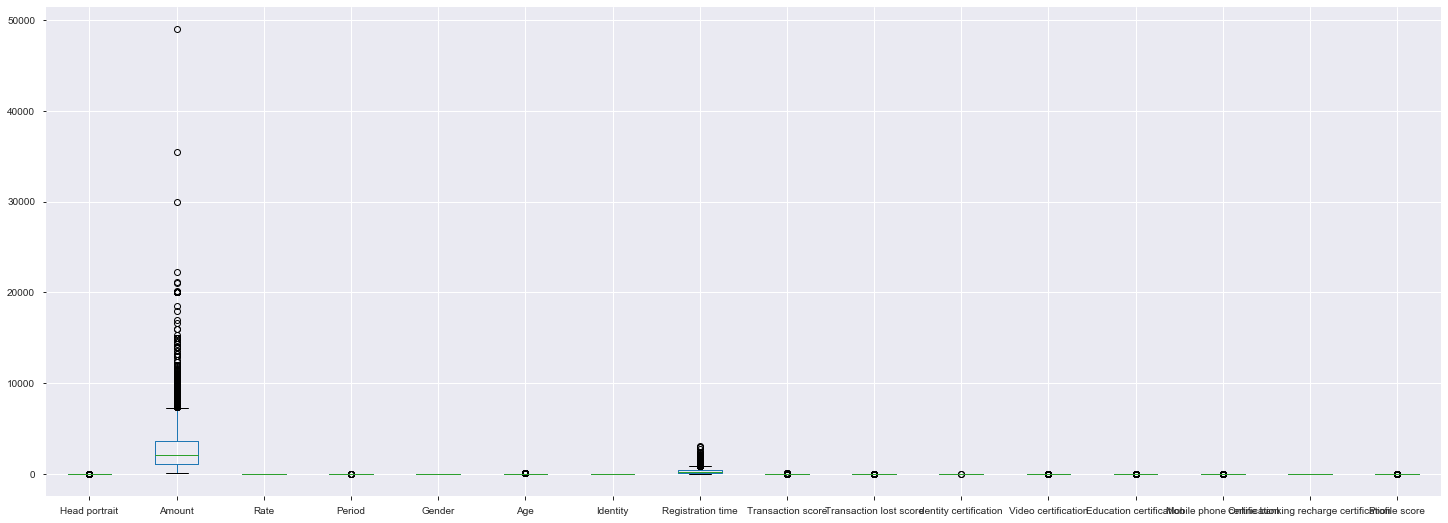

In [6]:
plt.figure(figsize=(25,9))

df.boxplot()

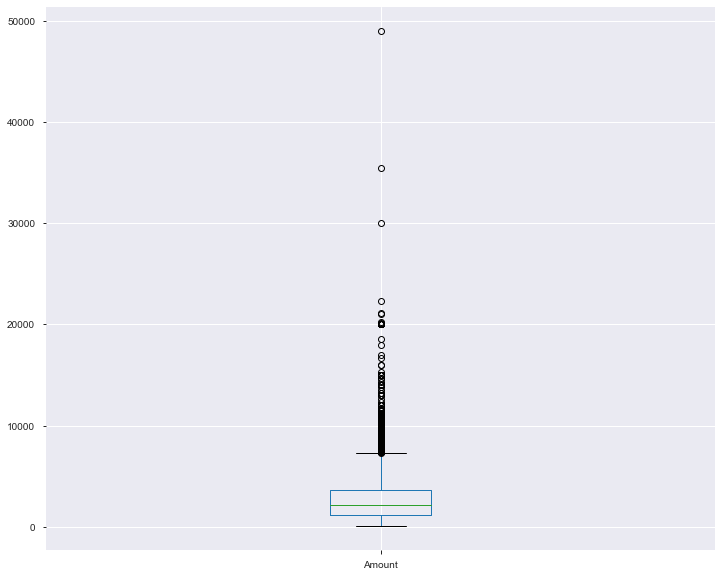

In [7]:
plt.figure(figsize=(12,10))

df.boxplot(column = 'Amount')

- Seems like there's a lot of outliers in the amount borrowed

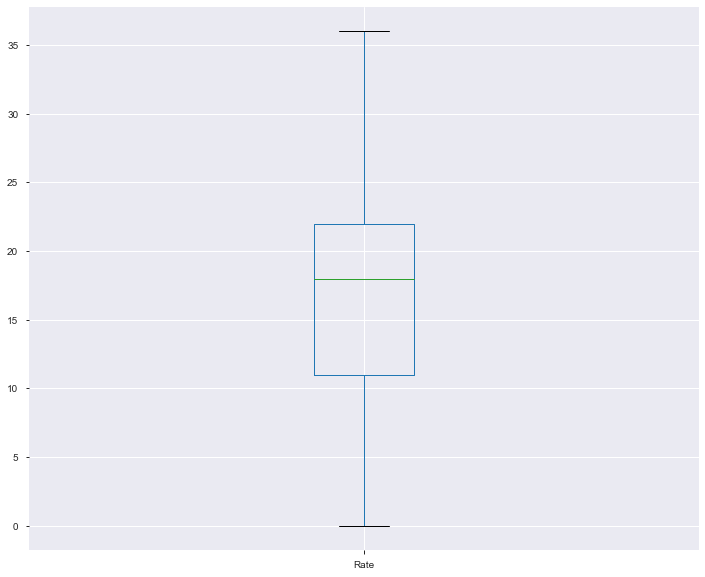

In [8]:
plt.figure(figsize=(12,10))

df.boxplot(column = 'Rate')

- There exists no outliers in the Rate column

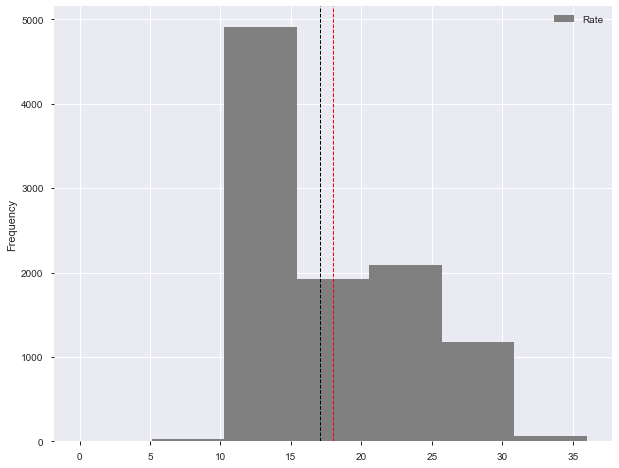

In [9]:
plt.figure(figsize= (10,8))


df['Rate'].plot.hist(bins = 7,color ='grey')
plt.axvline(df['Rate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Rate'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

- the rate is slightly skewed to the left

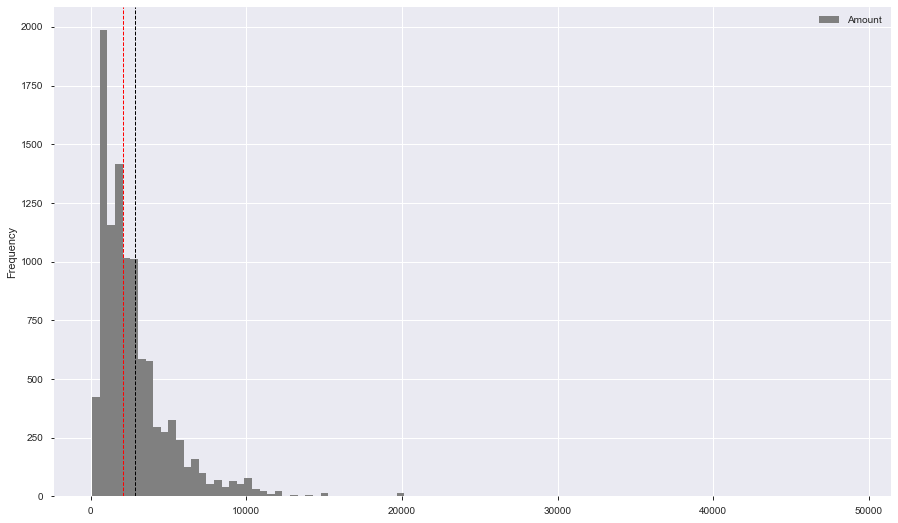

In [10]:
plt.figure(figsize=(15,9))



df['Amount'].plot.hist(bins = 100,color = 'grey')
plt.axvline(df['Amount'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Amount'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend()

- the plot indicates the plot is slightly skewed to the right

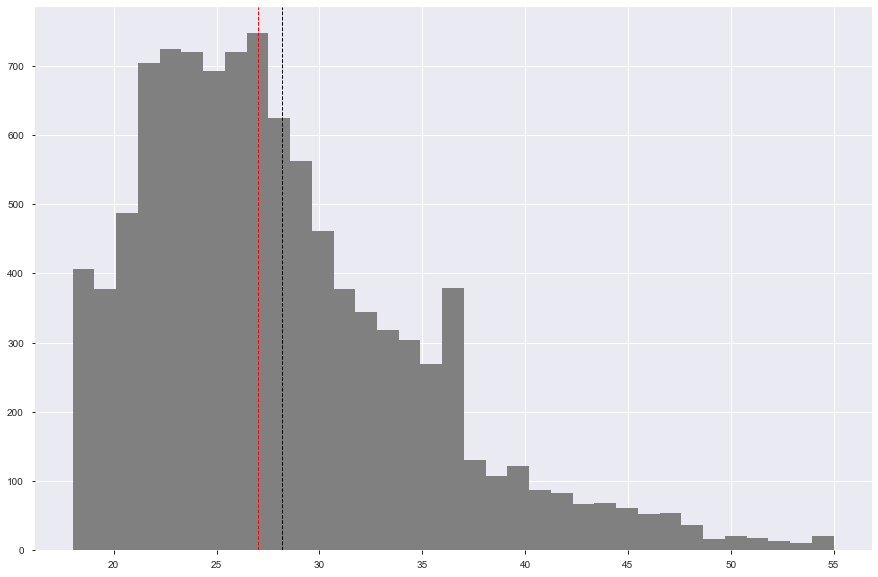

In [11]:
plt.figure(figsize=(15,10))

## The age is slightly skewed to the right

df['Age'].hist(bins= 35,color = 'grey')
plt.axvline(df['Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Age'].median(), color='r', linestyle='dashed', linewidth=1)

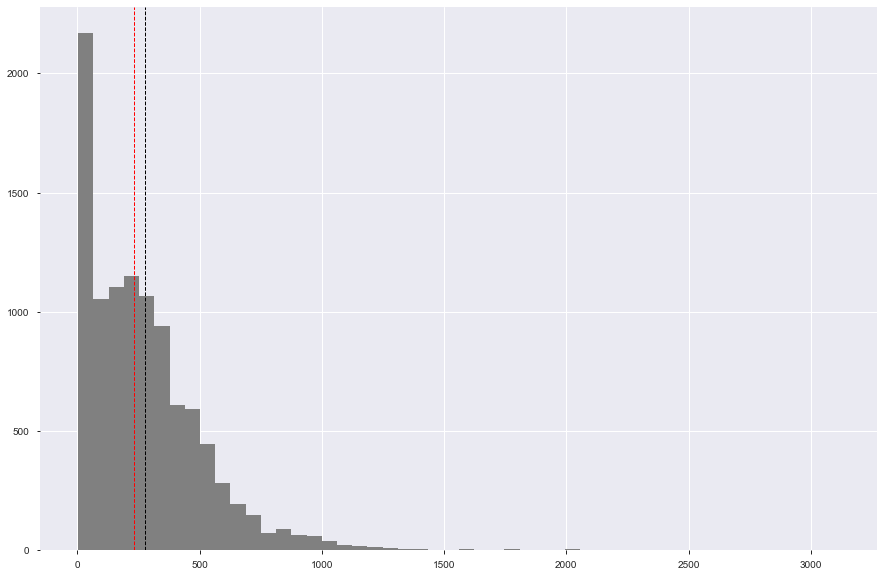

In [12]:
plt.figure(figsize=(15,10))

## The age is slightly skewed to the right

df['Registration time'].hist(bins= 50,color = 'grey')
plt.axvline(df['Registration time'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['Registration time'].median(), color='r', linestyle='dashed', linewidth=1)

In [13]:
df.isnull().sum()

Magic-Minnor rating                      0
Head portrait                            0
Amount                                   0
Rate                                     0
Period                                   0
Gender                                   0
Age                                      0
Identity                                 0
Registration time                        0
Transaction score                        0
Transaction lost score                   0
dentity certification                    0
Video certification                      0
Education certification                  0
Mobile phone certification               0
Online banking recharge certification    0
Profile score                            0
dtype: int64

In [14]:
df.mean().T

Head portrait                               0.015502
Amount                                   2832.204572
Rate                                       17.096089
Period                                      7.894231
Gender                                      0.735283
Age                                        28.172684
Identity                                    0.710754
Registration time                         275.165914
Transaction score                           4.641582
Transaction lost score                     -0.078100
dentity certification                       0.999804
Video certification                         0.014129
Education certification                     0.193779
Mobile phone certification                  0.126177
Online banking recharge certification       0.697998
Profile score                               0.630691
dtype: float64

In [15]:
df.median().T

Head portrait                               0.0
Amount                                   2100.0
Rate                                       18.0
Period                                      6.0
Gender                                      1.0
Age                                        27.0
Identity                                    1.0
Registration time                         232.0
Transaction score                           3.0
Transaction lost score                      0.0
dentity certification                       1.0
Video certification                         0.0
Education certification                     0.0
Mobile phone certification                  0.0
Online banking recharge certification       1.0
Profile score                               0.0
dtype: float64

* Based on the above statistical descriptions we can observe a few facts

> * The mean amount lent was 2832 yuan while the median amount was 2100 yuan thus indicating a right skewness 

> * The average interest rate was 17% whilst the median rate was 18%

> * The average age was 28 whilst the median one was 27

> * The average loan period was 7 months whilst the median is 6 months

> * The average time an account has been on the site after registration was 275 days whilst the median time was 232 indicating presence of outliers that are distorting the mean

> * The average transaction score which is the number of times a person has paid off a loan is 4.6 whilst the median one is 3

> * The average profile score is 0.63

In [16]:
pandas_profiling.ProfileReport(df)

* The pandas profiling report has revealed interseting information

> * Most people seem to have a good rating on the platform with close to half having the second highest rating overall but the next 3 ratings are poor and/or average which represent close to 47% of the overall borrowers are poor quality
> * Most people tend to take out loans of 12,6 and 3 months respectively
> * The most frequent interest rate is 11% but the second most frequent one is double that at 22%
> * Seems like most people 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

dset = df.iloc[:,1:]

calc_vif(dset)

variables        VIF
0                           Head_portrait   1.179437
1                                  Amount   2.893954
2                                    Rate  12.434991
3                                  Period   6.285301
4                                  Gender   3.889775
5                                     Age  20.699101
6                                Identity   3.998305
7                       Registration_time   4.153351
8                       Transaction_score   4.853078
9                  Transaction_lost_score   1.039650
10                  dentity_certification  34.460174
11                    Video_certification   1.136943
12                Education_certification   1.341776
13             Mobile_phone_certification   1.933123
14  Online_banking_recharge_certification   6.310473
15                          Profile_score   2.122819

* The above VIF values indicate high levels of multicollinearity especially between the identity certification and age variables

In [18]:
new_df = df.drop(['dentity_certification'],axis=1)


In [19]:
nset = new_df.iloc[:,1:]

calc_vif(nset)

variables        VIF
0                           Head_portrait   1.179103
1                                  Amount   2.893720
2                                    Rate  11.122718
3                                  Period   5.604103
4                                  Gender   3.498764
5                                     Age  10.746032
6                                Identity   3.960395
7                       Registration_time   4.105340
8                       Transaction_score   4.786649
9                  Transaction_lost_score   1.038044
10                    Video_certification   1.136157
11                Education_certification   1.339118
12             Mobile_phone_certification   1.929498
13  Online_banking_recharge_certification   6.270442
14                          Profile_score   2.101585

In [20]:
new_df2 = new_df.drop(['Rate'],axis = 1)

fset = new_df2.iloc[:,1:]

calc_vif(fset)

variables       VIF
0                           Head_portrait  1.178539
1                                  Amount  2.883909
2                                  Period  5.218946
3                                  Gender  3.491274
4                                     Age  8.935271
5                                Identity  3.938899
6                       Registration_time  4.099168
7                       Transaction_score  4.783153
8                  Transaction_lost_score  1.034192
9                     Video_certification  1.134112
10                Education_certification  1.331917
11             Mobile_phone_certification  1.927355
12  Online_banking_recharge_certification  5.037200
13                          Profile_score  2.100813

In [21]:
new_df3 = new_df2.drop(['Age'],axis = 1)

kset = new_df3.iloc[:,1:]

calc_vif(kset)

variables       VIF
0                           Head_portrait  1.178174
1                                  Amount  2.687635
2                                  Period  4.617730
3                                  Gender  3.019505
4                                Identity  3.427564
5                       Registration_time  4.067978
6                       Transaction_score  4.781752
7                  Transaction_lost_score  1.034168
8                     Video_certification  1.132888
9                 Education_certification  1.330290
10             Mobile_phone_certification  1.918400
11  Online_banking_recharge_certification  4.769530
12                          Profile_score  2.100310

- after removing the dentity_certification,Rate and Age variables,I was able to reduce The individual VIF scores of the other variables to below 5 which significantly reduces the multicollinearity that was observed before

- Later I will conduct a test to see if there is any difference between the accuracy scores observed during prediction


## EDA

### First we will explore the characteristics of 2 groups,that of the most frequent loan periods and most dominant rating

### We will try to answer the question whether there is a difference in loan amount taken between the 3 loan periods and most dominant rating?

In [22]:
tri_months = df.loc[(df['Period'] == 3) & (df['Magic-Minnor_rating'] == "AA")]

six_months = df.loc[(df['Period'] == 6) & (df['Magic-Minnor_rating'] == "AA")]

year_months = df.loc[(df['Period'] == 12) & (df['Magic-Minnor_rating'] == "AA")]

In [23]:
tri_months.shape

(1696, 17)

In [24]:
six_months.shape

(1518, 17)

In [25]:
year_months.shape

(1646, 17)

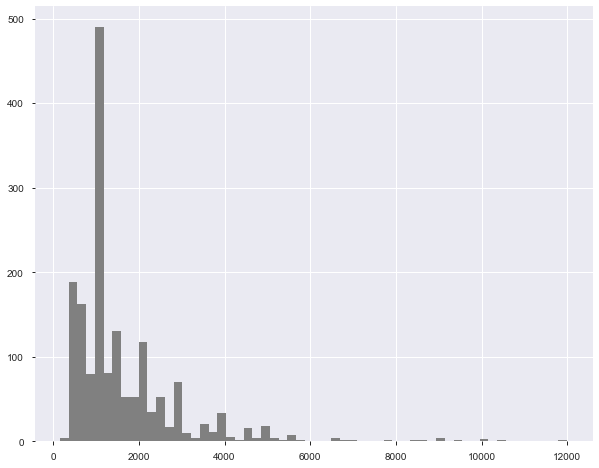

In [26]:
plt.figure(figsize= (10,8))

tri_months['Amount'].hist(bins = 58,color = 'grey')

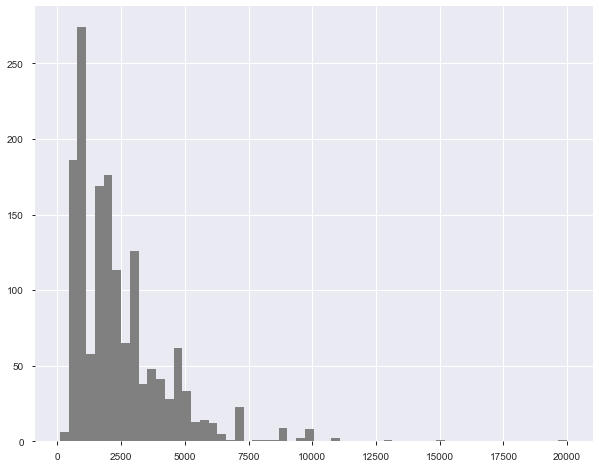

In [27]:
plt.figure(figsize= (10,8))

six_months['Amount'].hist(bins = 58,color = 'grey')

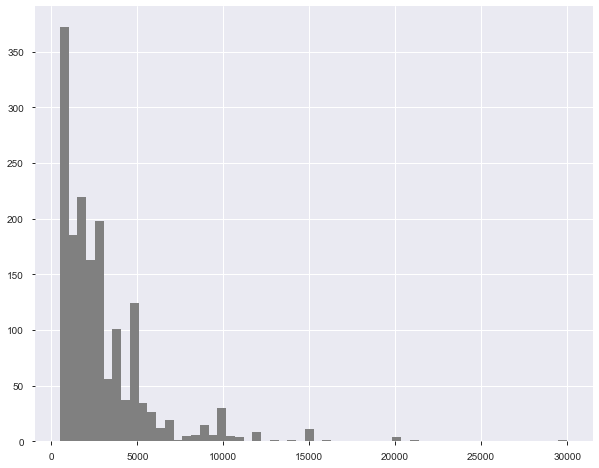

In [28]:
plt.figure(figsize= (10,8))

year_months['Amount'].hist(bins=58,color='grey')

In [29]:
means = [tri_months['Amount'],six_months['Amount'],year_months['Amount']]

for i in means:
    print(f'The corresponding median is {i.median()} for the amount')

The corresponding median is 1000.0 for the amount
The corresponding median is 2000.0 for the amount
The corresponding median is 2144.0 for the amount


- Above are the median amounts of money borrowed from lenders with a AA rating of between 3,6 and 12 months respectively

In [30]:
# first step is to draw samples from our target variables

tri_sample = tri_months['Amount'].sample(n=30)
six_sample = six_months['Amount'].sample(n=30)
year_sample = year_months['Amount'].sample(n=30)

In [31]:
#second step is to confirm that indeed our samples are not normally distributed

from scipy import stats

W,p = stats.shapiro(tri_sample)
W2,p2 = stats.shapiro(six_sample)
W3,p3 = stats.shapiro(year_sample)

print(f'The W critical value is {W}, while the p-value is {p}')
print(f'The W critical value is {W2}, while the p-value is {p2}')
print(f'The W critical value is {W3}, while the p-value is {p3}')

The W critical value is 0.7083860635757446, while the p-value is 2.0711840988951735e-06
The W critical value is 0.7292739152908325, while the p-value is 4.284937404008815e-06
The W critical value is 0.9323295950889587, while the p-value is 0.056638989597558975


- The above p-values indicate that we should reject the null hypothesis that our samples are indeed normally distributed
- Thus we can proceed to our non parametric test

- I will now proceed to conduct a kruskal-wallis test to see if the medians come from the same population or not

- The kruskal-wallis test is the non-parametric version of the one way anova.We are using it since the samples are not normally distributed

- I can see that the 12 month AA rating members have the highest median amaount but I do not know whether it is statistically significant 

- So the null hypothesis is that there is no difference between the population median and the sample medians while the alternative hypothesis is that there exists a difference.
- The test is conducted at a p-value of 0.05
- H0 = No difference
- Ha = difference

In [32]:

H, p = stats.kruskal(tri_sample,six_sample,year_sample)

print(f'The H critical value is {H}, while the p-value is {p}')


The H critical value is 16.398063710871078, while the p-value is 0.00027491960309150045


- The above p-value would indicate that we should reject the null hypothesis and that the sample medians do NOT come from the same population

- considering the population median is 2100 and that only one of the medians '3 month AA Rating' is far below this,we can safely assume that it is the one that doesnt come from the population

- Thus we have answered our original question with a yes,The is a difference between the loan amounts taken between the 3 loan periods

### Next we will explore the characteristics of the next 3 ratings which make up 46.9% of the dataset 

In [33]:
d_rating = df.loc[(df['Magic-Minnor_rating'] == "D")]
c_rating = df.loc[(df['Magic-Minnor_rating'] == "C")]
e_rating = df.loc[(df['Magic-Minnor_rating'] == "E")]

In [34]:
d_rating.shape

(1996, 17)

In [35]:
c_rating.shape

(1528, 17)

In [36]:
e_rating.shape

(1253, 17)

In [37]:
d_rating.head()

Magic-Minnor_rating  Head_portrait  Amount  Rate  Period  Gender  Age  \
6871                   D              0     301  22.0       6       1   23   
6872                   D              0     500  22.0      12       1   20   
6873                   D              0     500  22.0      12       1   20   
6874                   D              0     500  22.0      12       1   23   
6875                   D              0     500  22.0      12       1   20   

      Identity  Registration_time  Transaction_score  Transaction_lost_score  \
6871         0                 67                  2                       0   
6872         0                151                  5                       0   
6873         0                190                  7                       0   
6874         0                253                  7                       0   
6875         1                196                  3                       0   

      dentity_certification  Video_certification  Education_certification  \
6871                      1                    0                        0   
6872                      1                    0                        0   
6873                      1                    0                        0   
6874                      1                    0                        0   
6875                      1                    0                        0   

      Mobile_phone_certification  Online_banking_recharge_certification  \
6871                           0                                      1   
6872                           0                                      1   
6873                           0                                      1   
6874                           0                                      1   
6875                           0                                      1   

      Profile_score  
6871              0  
6872              0  
6873              0  
6874              1  
6875              0

In [38]:
ratings = [d_rating,c_rating,e_rating]

for i in ratings:
    print(i['Amount'].mean())

3323.201903807615
3588.4535340314137
2439.9233838786913


In [39]:
for i in ratings:
    print(i['Amount'].median())

2800.0
3000.0
2000.0


- Taking a quick look it seems that the worse rated lenders seem on average to be borrowing more money than the 'AA' rated customers 

### General dataset analysis

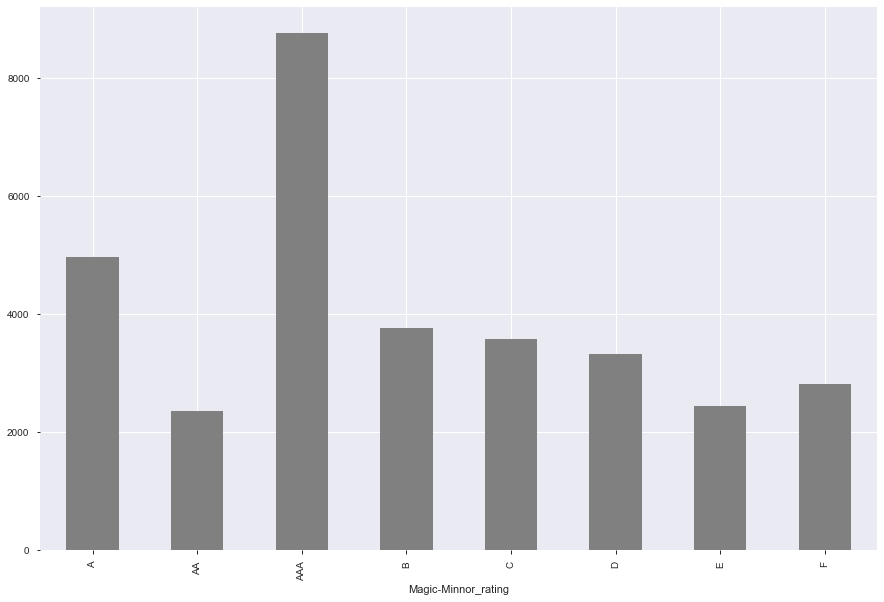

In [40]:
plt.figure(figsize=(15,10))

df.groupby('Magic-Minnor_rating')['Amount'].mean().plot.bar(color='grey')

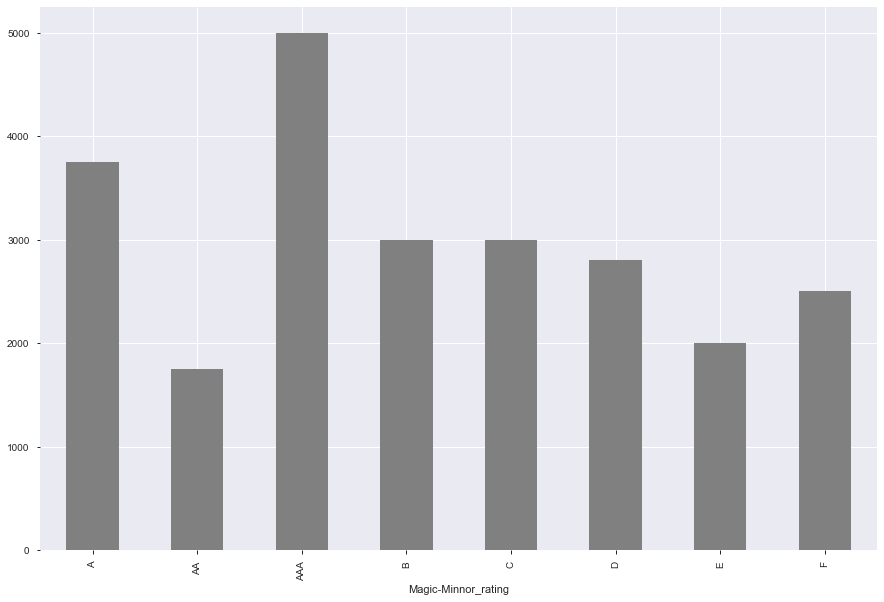

In [41]:
plt.figure(figsize=(15,10))

df.groupby('Magic-Minnor_rating')['Amount'].median().plot.bar(color='grey')

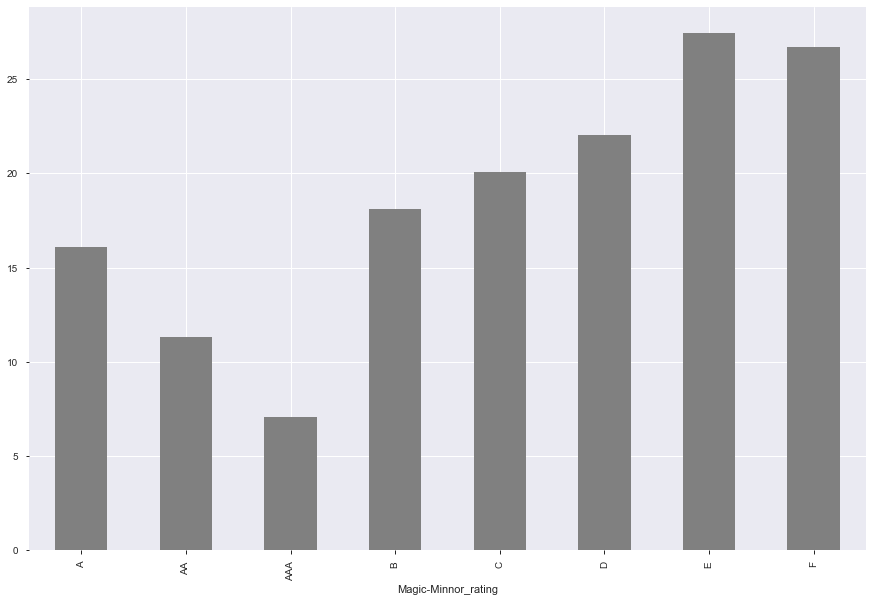

In [42]:
plt.figure(figsize=(15,10))

df.groupby(['Magic-Minnor_rating'])['Rate'].mean().plot.bar(color ='grey')

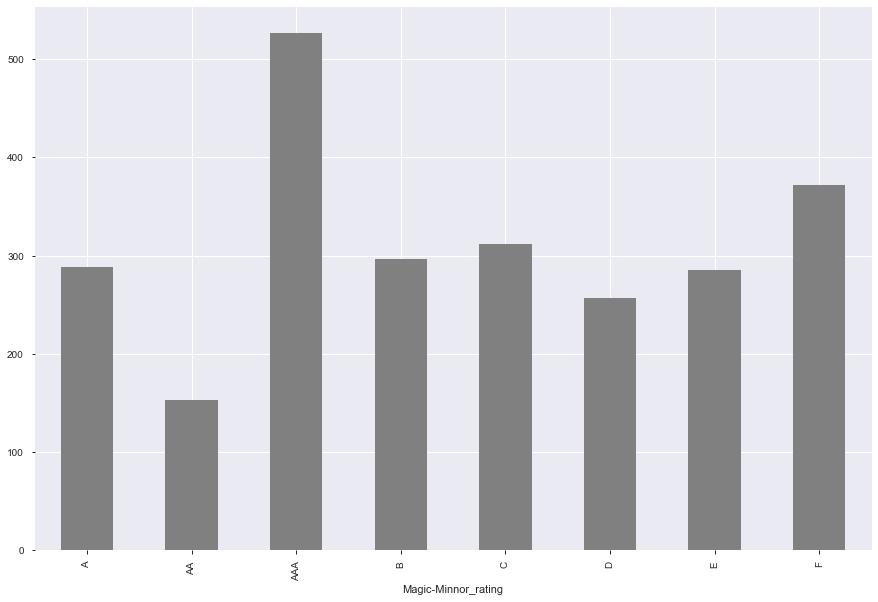

In [43]:
plt.figure(figsize=(15,10))

df.groupby(['Magic-Minnor_rating'])['Registration_time'].median().plot.bar(color = 'grey')

- Seems like the best rated lenders have been on the platform the longest which is expected but the second longest tenured lenders are the worst performing ones,which is curious

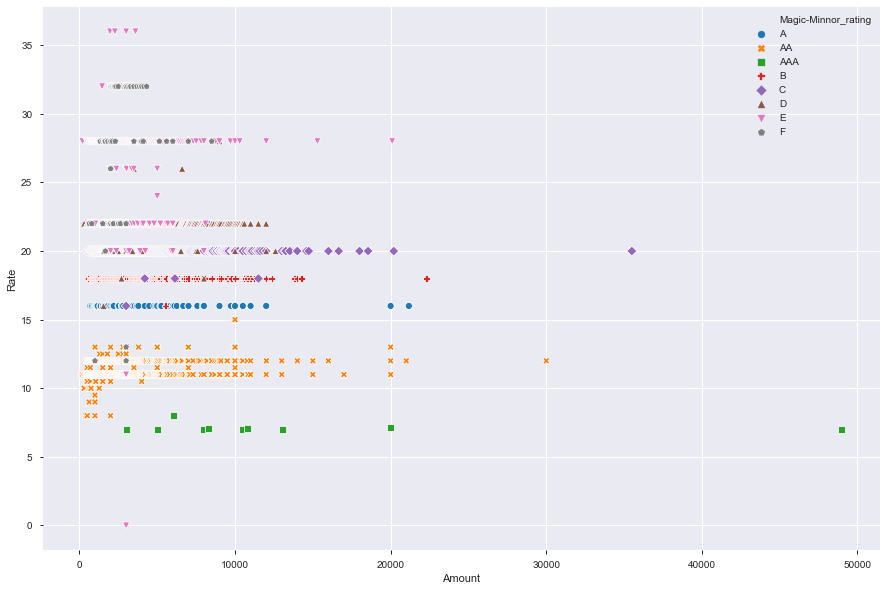

In [44]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = df,x = 'Amount',y = 'Rate',hue='Magic-Minnor_rating',style = 'Magic-Minnor_rating')

- Surprisingly The E rated borrowers have worst rates than the F rated ones,but nobody with a rating of below D gets an interest rate of above 20%

- Some borrowers with F ratings are getting better rates than ones with A ratings

- Seems like most C rated borrowers are the ones who borrow more than 10,000 yuan



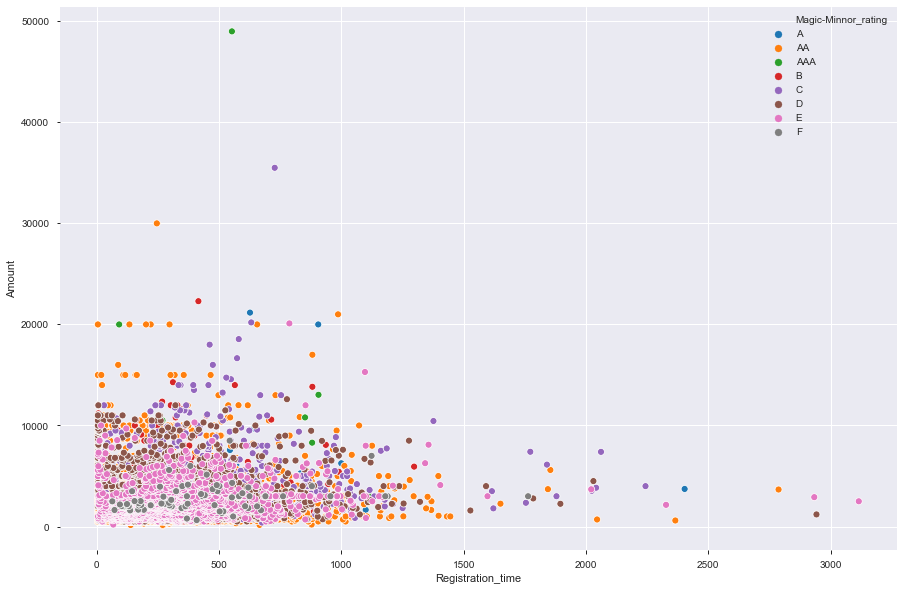

In [45]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = df,x = 'Registration_time',y = 'Amount',hue= 'Magic-Minnor_rating')

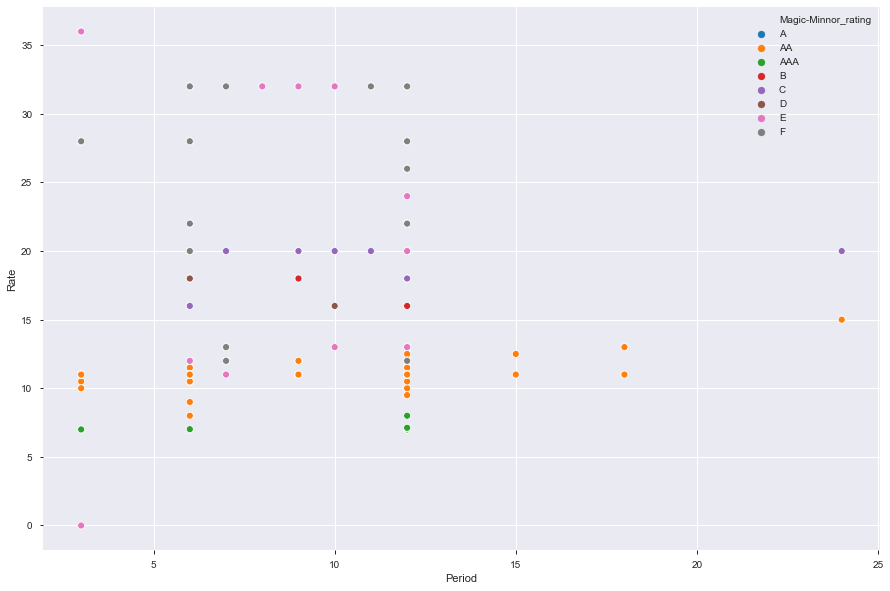

In [46]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = df,x = 'Period',y ='Rate' ,hue= 'Magic-Minnor_rating')

- There seems to be a slight correlation between the interest rate charged and the period of the loan with longer period loans attracting higher rates

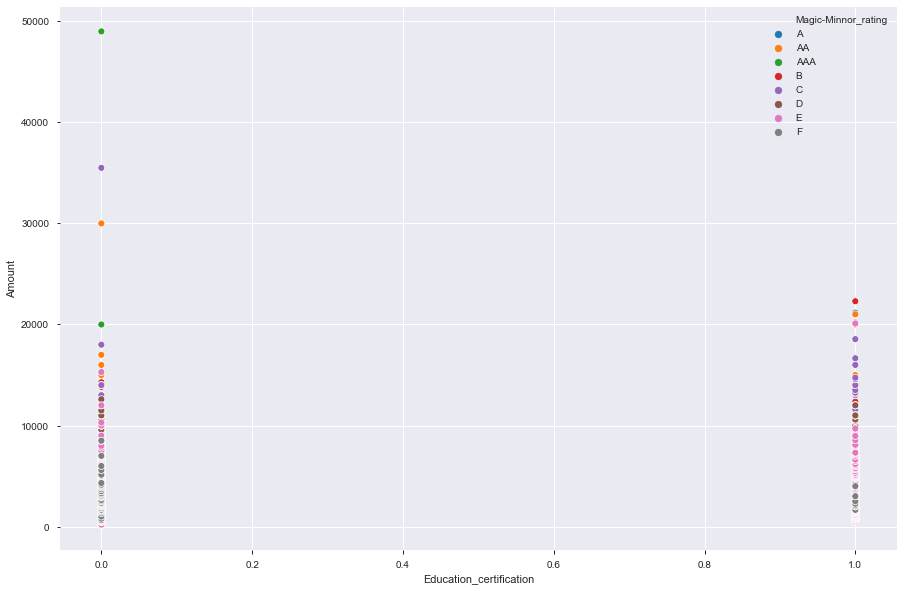

In [47]:
plt.figure(figsize=(15,10))

sns.scatterplot(data = df,x = 'Education_certification',y = 'Amount',hue= 'Magic-Minnor_rating')

<Figure size 1080x720 with 0 Axes>

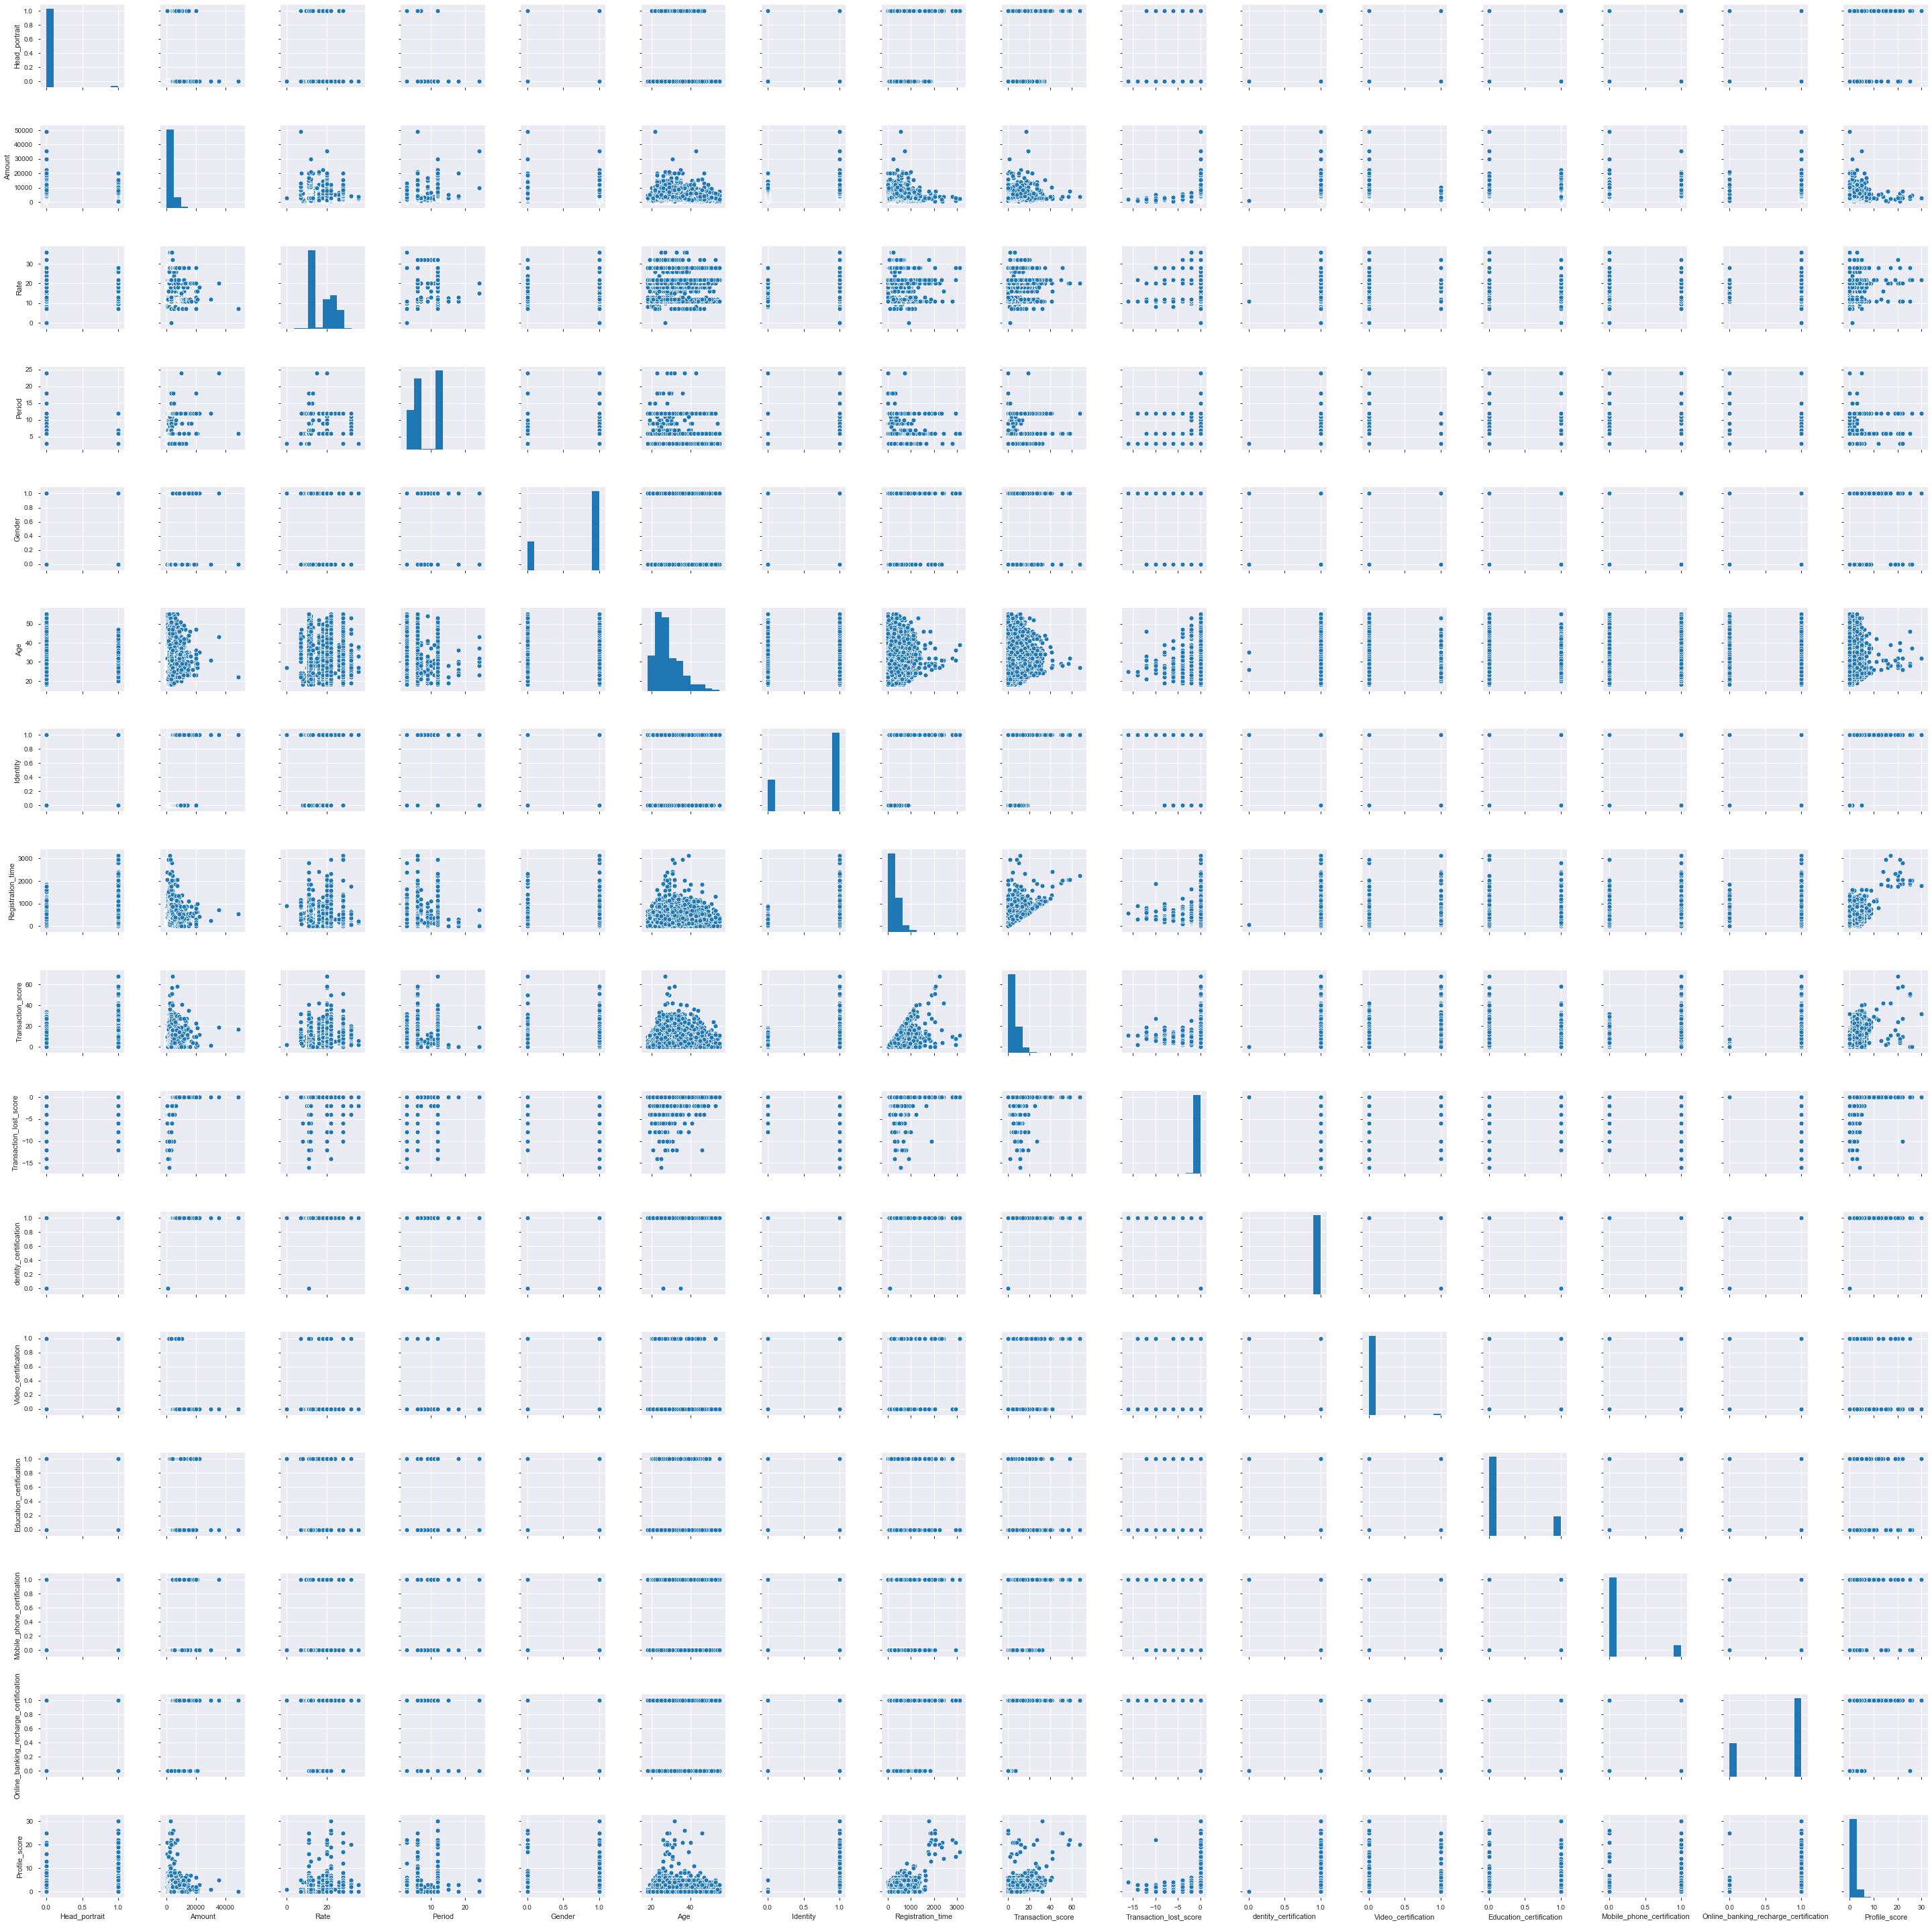

In [48]:
plt.figure(figsize=(15,10))
sns.pairplot(df)

## Modelling

- we'll use sklearn's multi-output regressor model and wrap it around other regressor models and check whether the results are different in any sense

- Earlier we noticed a high level of multi-collinearity between 3 variables and i'd like to create 3 different models,starting with one which has all the variables except the one with the highest multicollinearity which was 'dentity_certification' and then progress to remove each variable individually and observe what effect that has on the accuracy of the model

- Before proceeding I will recount the facts that I have learnt from the EDA and data exploration that I did above
> - Most loans are below 10,000 yuan and there are multiple outliers but these have minimal effect on the overall dataset as evidenced by the low spread between the mean and median
> - Borrowers who borrow for a shorter period of time tend to take out far smaller amounts compared to those borrowing for more than 6 months and at lower interest rates as well
> - The best rated borrowers tend to take the largest loans on average but the second best rated group tends to borrow the least amount 
> - The second worst rated borrowers tend to attract the highest interest rate on average


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import category_encoders as ce

In [50]:
df2 = df

encoder = ce.OrdinalEncoder(cols = ['Magic-Minnor_rating'],return_df = True,mapping = [{'col':'Magic-Minnor_rating',
                                                    'mapping':{'None':0,'F':1,'E':2,'D':3,'C':4,'B':5,'A':6,'AA':7,'AAA':8}}])

df2 = encoder.fit_transform(df2)

df2.head()

Magic-Minnor_rating  Head_portrait  Amount  Rate  Period  Gender  Age  \
0                    6              0     700  16.0      12       0   22   
1                    6              0     778  16.0       6       0   19   
2                    6              0     798  22.0      12       1   28   
3                    6              0     822  16.0       6       0   21   
4                    6              0     912  16.0       6       0   35   

   Identity  Registration_time  Transaction_score  Transaction_lost_score  \
0         0                293                  4                       0   
1         0                284                  9                       0   
2         1                266                  8                       0   
3         0                331                 11                       0   
4         0                107                  4                       0   

   dentity_certification  Video_certification  Education_certification  \
0                      1                    0                        0   
1                      1                    0                        0   
2                      1                    0                        1   
3                      1                    0                        1   
4                      1                    0                        1   

   Mobile_phone_certification  Online_banking_recharge_certification  \
0                           0                                      1   
1                           0                                      1   
2                           0                                      1   
3                           0                                      1   
4                           0                                      1   

   Profile_score  
0              0  
1              0  
2              0  
3              0  
4              0

In [51]:
df2 = df2.drop(['dentity_certification'],axis=1)
df2.head()

Magic-Minnor_rating  Head_portrait  Amount  Rate  Period  Gender  Age  \
0                    6              0     700  16.0      12       0   22   
1                    6              0     778  16.0       6       0   19   
2                    6              0     798  22.0      12       1   28   
3                    6              0     822  16.0       6       0   21   
4                    6              0     912  16.0       6       0   35   

   Identity  Registration_time  Transaction_score  Transaction_lost_score  \
0         0                293                  4                       0   
1         0                284                  9                       0   
2         1                266                  8                       0   
3         0                331                 11                       0   
4         0                107                  4                       0   

   Video_certification  Education_certification  Mobile_phone_certification  \
0                    0                        0                           0   
1                    0                        0                           0   
2                    0                        1                           0   
3                    0                        1                           0   
4                    0                        1                           0   

   Online_banking_recharge_certification  Profile_score  
0                                      1              0  
1                                      1              0  
2                                      1              0  
3                                      1              0  
4                                      1              0

### Decision-Tree Regressor

In [52]:
y = df2[['Amount','Rate']]
x = df2.drop(['Amount','Rate'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state =24)

In [53]:
model = MultiOutputRegressor(DecisionTreeRegressor()).fit(X_train,y_train)

pred = model.predict(X_test)

MSE = mse(y_test, pred)
RMSE = np.sqrt(MSE)

print(r2_score(y_test,pred))
print('The RMSE Score is:',RMSE)

0.31764498841744987
The RMSE Score is: 2135.400392925497


In [54]:
x2 = df2.drop(['Amount','Rate','Age'],axis = 1)

X_train,X_test,y_train,y_test = train_test_split(x2,y,test_size= 0.3,random_state = 24)

model2 = MultiOutputRegressor(DecisionTreeRegressor()).fit(X_train,y_train)

pred2 = model2.predict(X_test)

MSE = mse(y_test,pred2)
RMSE = np.sqrt(MSE)

print(r2_score(y_test,pred2))
print('The RMSE Score is:',RMSE)

0.3625714851296078
The RMSE Score is: 2050.8696279490177


- Noting a above that our r2 scores are very low indicating our model isn't fitting our data that well
- Also Noting that the score improved slightly once we dropped the Age variable which had high multicollinearity

- Some of our features are highly skewed and this could be affecting the preformance of our model,I will proceed to perform some feature engineering on these variables namely standardization and normalisation 

In [55]:
x2.dtypes

Magic-Minnor_rating                      int32
Head_portrait                            int64
Period                                   int64
Gender                                   int64
Identity                                 int64
Registration_time                        int64
Transaction_score                        int64
Transaction_lost_score                   int64
Video_certification                      int64
Education_certification                  int64
Mobile_phone_certification               int64
Online_banking_recharge_certification    int64
Profile_score                            int64
dtype: object

In [56]:
x2_norm = MinMaxScaler().fit_transform(x2)



x2_norm

array([[0.71428571, 0.        , 0.42857143, ..., 0.        , 1.        ,
        0.        ],
       [0.71428571, 0.        , 0.14285714, ..., 0.        , 1.        ,
        0.        ],
       [0.71428571, 0.        , 0.42857143, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.42857143, ..., 1.        , 1.        ,
        0.13333333],
       [0.        , 0.        , 0.42857143, ..., 1.        , 1.        ,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.1       ]])

In [57]:
X_train,X_test,y_train,y_test = train_test_split(x2_norm,y,test_size= 0.3,random_state = 24)

model3 = MultiOutputRegressor(DecisionTreeRegressor()).fit(X_train,y_train)

pred3 = model3.predict(X_test)

print(r2_score(y_test,pred3))

0.3539117454203912


In [58]:
x2_scaled = StandardScaler().fit_transform(x2)

x2_scaled

array([[ 0.47649508, -0.12548491,  1.11702685, ..., -0.3799961 ,
         0.65777502, -0.40726633],
       [ 0.47649508, -0.12548491, -0.51534962, ..., -0.3799961 ,
         0.65777502, -0.40726633],
       [ 0.47649508, -0.12548491,  1.11702685, ..., -0.3799961 ,
         0.65777502, -0.40726633],
       ...,
       [-1.99371748, -0.12548491,  1.11702685, ...,  2.63160596,
         0.65777502,  2.1757196 ],
       [-1.99371748, -0.12548491,  1.11702685, ...,  2.63160596,
         0.65777502,  0.88422664],
       [-1.99371748, -0.12548491, -1.33153786, ...,  2.63160596,
         0.65777502,  1.52997312]])

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x2_scaled,y,test_size= 0.3,random_state = 24)

model4 = MultiOutputRegressor(DecisionTreeRegressor()).fit(X_train,y_train)

pred4 = model4.predict(X_test)

print(r2_score(y_test,pred4))

0.34674216692238413


- After performing standardization and normalization on the features,I noted no increase in model accuracy.I believe the major reason is that majority of the features are boolean and ordinal values whose distribution does not matter quite so,thus I will proceed to conduct feature engineering on the target variables instead and note any differences

[12:50:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9710998384427291
The RMSE Score is: 0.12495952006792314
0.9868060311351053


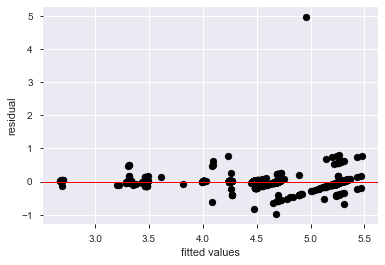

In [66]:
y2 = df['Rate']
y2 = y2.apply(np.sqrt)

X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size= 0.3,random_state = 24)

xgb_reg = xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=24, learning_rate=0.1)

model5 = xgb_reg.fit(X_train,y_train)

pred5 = model5.predict(X_test)

MSE = mse(y_test,pred5)
RMSE = np.sqrt(MSE)

print(r2_score(y_test,pred5))
print('The RMSE Score is:',RMSE)
score = xgb_reg.score(X_train, y_train) 
print(score)


residuals = np.subtract(pred5, y_test)

plt.scatter(pred5, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [101]:
import pickle
pickle_out = open("Loan_rate_regressor.pkl","wb")
pickle.dump(model5,pickle_out)
pickle_out.close()

[12:38:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.27721100589559255
The RMSE Score is: 0.6352863523445818
0.3253130421844752


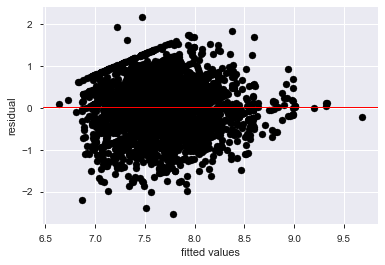

In [62]:
y3 = df['Amount']

y3 = y3.apply(np.log)

X_train,X_test,y_train,y_test = train_test_split(x2,y3,test_size= 0.3,random_state = 0)

xgb_reg = xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=24, learning_rate=0.1)

model6 = xgb_reg.fit(X_train,y_train)

pred6 = model6.predict(X_test)

MSE = mse(y_test,pred6)
RMSE = np.sqrt(MSE)

print(r2_score(y_test,pred6))
print('The RMSE Score is:',RMSE)

score = xgb_reg.score(X_train, y_train) 
print(score)

residuals = np.subtract(pred6, y_test)

plt.scatter(pred6, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

- I decided not to do a multioutput regression model as I xgboost doesnt support multioutput dependent variables even after wrapping it with the multioutputregressor model from sklearn.


- Though I have discovered interesting characteristics about the model and data,log transforming the data improves the model fit to the data and reduces heteroscedasticity that was observed before log transformation,also the target variable's 'Amount' outliers are messing with the prediction.


- After testing with multiple transformations on the rate variable,I found that applying a square-root transformation on the target variable worked enormously to increase both accuracy to over 97% and reduce RMSE to below 0.13 which indicates a highly accurate model with good fit.


- I will now proceed to drop the outliers in the Amount Variable and observe if there is any improvement in the model's accuracy

In [77]:
q1 = df2['Amount'].quantile(0.25)
q3 = df2['Amount'].quantile(0.75)
iqr = q3-q1

fresh_df = df2[~((df2['Amount'] < (q1 - 1.5 * iqr)) | (df2['Amount'] > (q3 +1.5 * iqr)))]

fresh_df.shape

(9684, 16)

In [78]:
fresh_df.columns

Index(['Magic-Minnor_rating', 'Head_portrait', 'Amount', 'Rate', 'Period',
       'Gender', 'Age', 'Identity', 'Registration_time', 'Transaction_score',
       'Transaction_lost_score', 'Video_certification',
       'Education_certification', 'Mobile_phone_certification',
       'Online_banking_recharge_certification', 'Profile_score'],
      dtype='object')

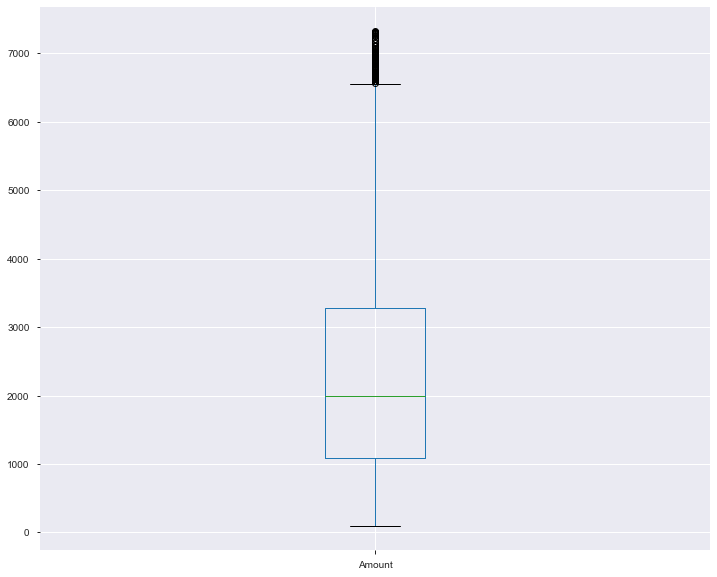

In [79]:
plt.figure(figsize=(12,10))
fresh_df.boxplot(column = 'Amount')

- Above we have confirmed that we have removed majority of the extreme outliers with a standard deviation greater than 3

[14:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.2622131431881365
The RMSE Score is: 0.5842116423114256
0.2841318660383929


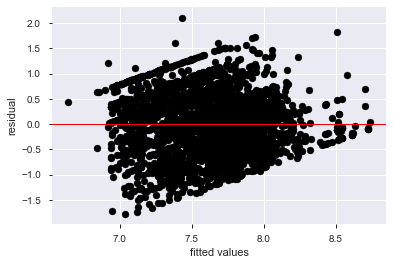

In [100]:
y4 = fresh_df['Amount']

x3 = fresh_df.drop(['Amount','Rate','Age'],axis = 1)

x3['Registration_time'] = x3['Registration_time'].apply(np.log)

y4 = y4.apply(np.log)

X_train,X_test,y_train,y_test = train_test_split(x3,y4,test_size= 0.3,random_state = 24)

xgb_reg = xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=24, learning_rate=0.1)

model7 = xgb_reg.fit(X_train,y_train)

pred7 = model7.predict(X_test)

MSE = mse(y_test,pred7)
RMSE = np.sqrt(MSE)

print(r2_score(y_test,pred7))
print('The RMSE Score is:',RMSE)

score = xgb_reg.score(X_train, y_train) 
print(score)

residuals = np.subtract(pred7, y_test)

plt.scatter(pred7, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

- Model fit has improved slightly but accuracy has remained stagnant